# Amplitude and Frequency visualizer with fft

In [2]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

%matplotlib tk

In [3]:
sampling_rate, data = scipy.io.wavfile.read('MoonlightSonata.wav')
length = data.shape[0] / sampling_rate

print(data.shape)

(15310336, 2)


In [4]:
data_fft = scipy.fft.fft(data[0:15310000, 0])
data_fft[0]

(-7877524-0j)

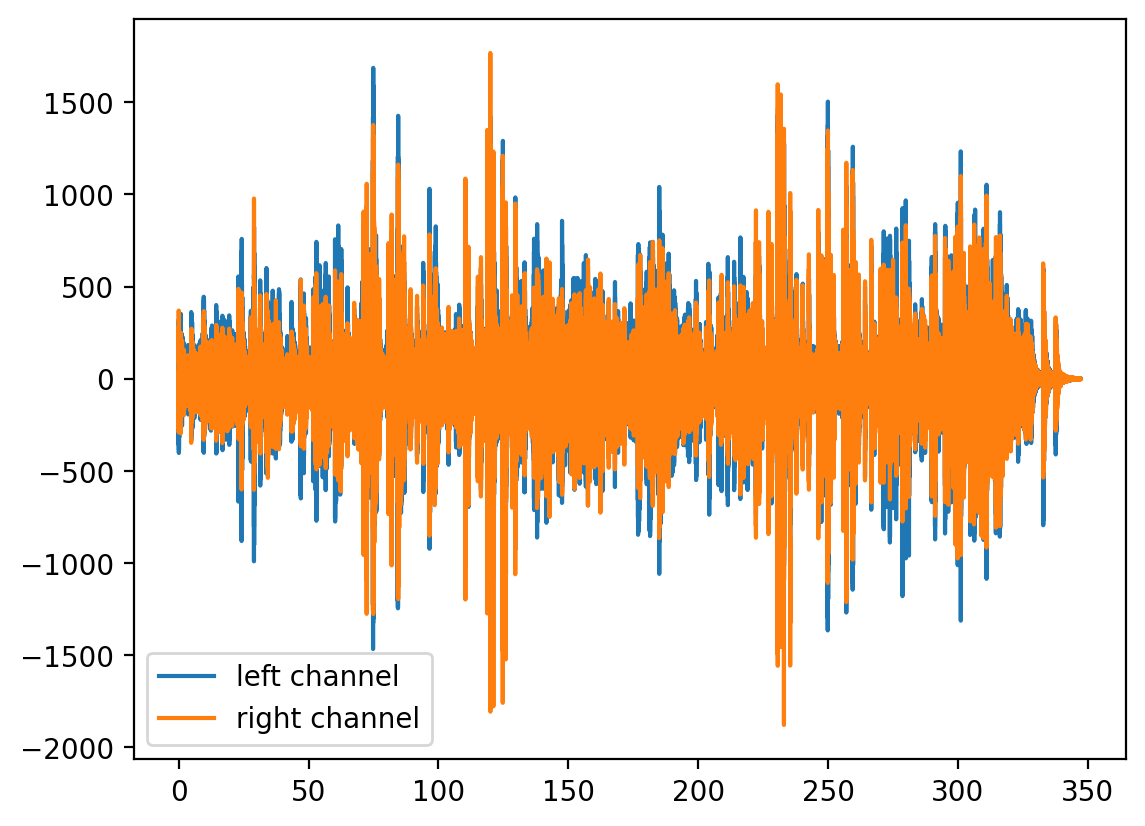

In [13]:
time = np.linspace(0, length, data.shape[0])
plt.plot(time, data[:,0], label="left channel")
plt.plot(time, data[:,1], label="right channel")
plt.legend()
plt.show()

In [7]:
(data_fft[20])

(-10592.536422034296+7021.889713042077j)

In [6]:
mag_part = np.absolute(data_fft)
# bins = np.linspace(np.amin(mag_part), np.amax(mag_part), num=100)
# plt.hist(mag_part, bins=bins)
plt.plot(mag_part)
plt.show()


In [9]:
sample_data = data[0:15310000, 0]

chunk_length = 10000
chunks = np.split(sample_data, len(sample_data) / chunk_length)


fig, ax = plt.subplots()
x = np.arange(0,chunk_length, 1)
line, = ax.plot(x, np.random.random(chunk_length))
ax.set_ylim(-1000, 1000)
ax.set_xlim(0, chunk_length)

for chunk in chunks:
    line.set_ydata(chunk)
    fig.canvas.draw()
    fig.canvas.flush_events()

TclError: 

In [6]:
chunk_length = 1024 * 2
lim = (len(data) // chunk_length) * chunk_length
sample_data = data[0:lim, 0]


chunks = np.split(sample_data, len(sample_data) / chunk_length)


fig, ax = plt.subplots()
x = np.arange(0,chunk_length)
line, = ax.semilogx(x, np.random.random(len(x)))
ax.set_ylim(0, 1)
ax.set_xlim(0, chunk_length / 2)


mini = 1e10
maxi = 0
for chunk in chunks:

    chunk_fft = np.absolute(scipy.fft.fft(chunk)) / 75000
    maxi = max(maxi, max(chunk_fft))
    mini = min(mini, min(chunk_fft))

    line.set_ydata(chunk_fft)
    fig.canvas.draw()
    fig.canvas.flush_events()

print(maxi, mini)

C:\Users\mohit\AppData\Local\Temp\ipykernel_50428\1719347470.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, chunk_length / 2)


7.513236724445087 0.0
